In [1]:
import pandas as pd

# Load the dataset
file_path = "dataset_heart.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


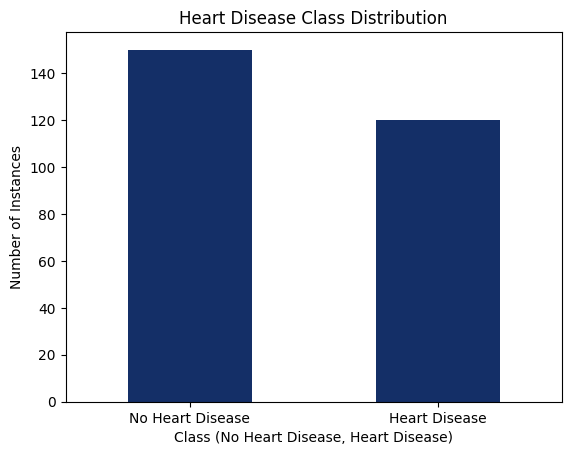

heart disease
1    150
2    120
Name: count, dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'dataset_heart.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

# Plot a bar chart for class distribution between heart disease and no heart disease
class_distribution = df['heart disease'].value_counts() 
class_distribution.plot(kind='bar', color=['#142f67', '#142f67'])

# Add labels and title
plt.title('Heart Disease Class Distribution')
plt.xlabel('Class (No Heart Disease, Heart Disease)')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'], rotation=0)
plt.show()
# Calculate the number of samples for each class
heart_disease_counts = df['heart disease'].value_counts()

# Display the counts
heart_disease_counts


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = df.drop(columns=["heart disease"])  # Features
y = df["heart disease"]  # Target

label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=56)

# Initialize and train MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.7222222222222222,
 '              precision    recall  f1-score   support\n\n           1       0.76      0.83      0.79        35\n           2       0.62      0.53      0.57        19\n\n    accuracy                           0.72        54\n   macro avg       0.69      0.68      0.68        54\nweighted avg       0.71      0.72      0.72        54\n')

In [63]:
# Count the number of samples for each class in the train and test sets
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

# Print the number of samples for each class
print("Training set distribution:")
print(f"Heart Disease: {train_counts[2]} samples")
print(f"No Heart Disease: {train_counts[1]} samples")

print("\nTest set distribution:")
print(f"Heart Disease: {test_counts[2]} samples")
print(f"No Heart Disease: {test_counts[1]} samples")


Training set distribution:
Heart Disease: 101 samples
No Heart Disease: 115 samples

Test set distribution:
Heart Disease: 19 samples
No Heart Disease: 35 samples


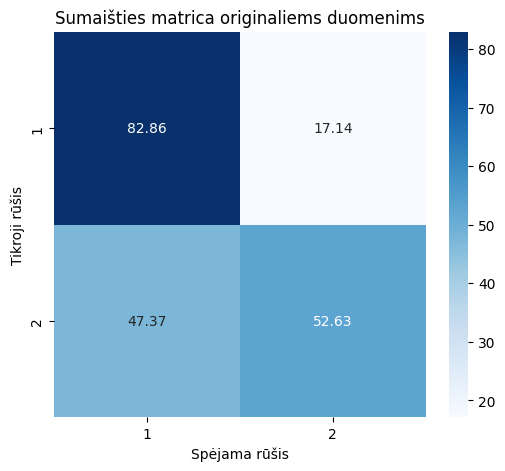

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
# Encode the target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix in percentages
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Spėjama rūšis")
plt.title("Sumaišties matrica originaliems duomenims")
plt.ylabel("Tikroji rūšis")
plt.show()



In [4]:
# Calculate class distribution percentages
class_distribution = y.value_counts(normalize=True) * 100

# Display the class distribution
class_distribution


heart disease
1    55.555556
2    44.444444
Name: proportion, dtype: float64

Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           1       0.89      0.94      0.91        33
           2       0.89      0.81      0.85        21

    accuracy                           0.89        54
   macro avg       0.89      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


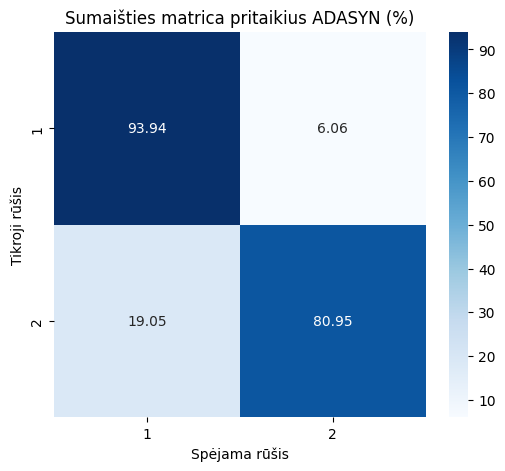

In [41]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the original data into train and test sets first
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply ADASYN only to the training data
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Train MLP Classifier on resampled training data
mlp_resampled = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=3)
mlp_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original test set
y_pred = mlp_resampled.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

# Encode the target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix in percentages
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Spėjama rūšis")
plt.title("Sumaišties matrica pritaikius ADASYN (%)")
plt.ylabel("Tikroji rūšis")
plt.show()


Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           1       0.97      0.86      0.91        37
           2       0.76      0.94      0.84        17

    accuracy                           0.89        54
   macro avg       0.87      0.90      0.88        54
weighted avg       0.90      0.89      0.89        54



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


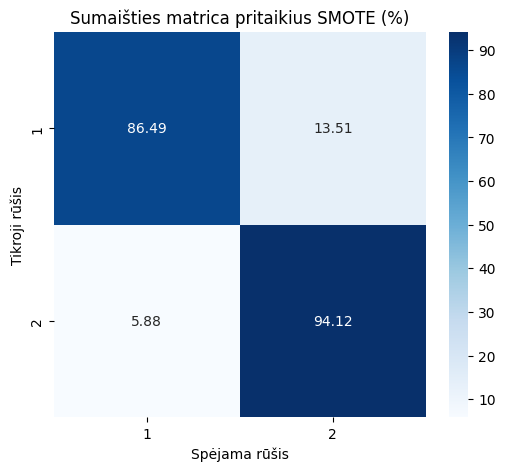

In [64]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the original data into train and test sets first
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=900)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train MLP Classifier on SMOTE-resampled training data
mlp_smote = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
mlp_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the original test set
y_pred = mlp_smote.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Convert confusion matrix to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix in percentages
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Spėjama rūšis")
plt.title("Sumaišties matrica pritaikius SMOTE (%)")
plt.ylabel("Tikroji rūšis")
plt.show()

Accuracy: 0.8518518518518519
              precision    recall  f1-score   support

           1       0.88      0.88      0.88        33
           2       0.81      0.81      0.81        21

    accuracy                           0.85        54
   macro avg       0.84      0.84      0.84        54
weighted avg       0.85      0.85      0.85        54



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


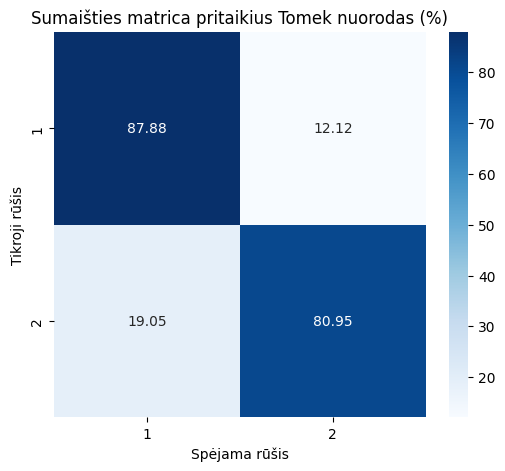

In [47]:
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the original data into train and test sets first
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply Tomek Links only to the training data
tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

# Train MLP Classifier on Tomek Links-resampled training data
mlp_tomek = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=3)
mlp_tomek.fit(X_train_tomek, y_train_tomek)

# Make predictions on the original test set
y_pred = mlp_tomek.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Convert confusion matrix to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix in percentages
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Spėjama rūšis")
plt.title("Sumaišties matrica pritaikius Tomek nuorodas (%)")
plt.ylabel("Tikroji rūšis")
plt.show()


Accuracy: 0.8703703703703703
              precision    recall  f1-score   support

           1       0.86      0.94      0.90        33
           2       0.89      0.76      0.82        21

    accuracy                           0.87        54
   macro avg       0.88      0.85      0.86        54
weighted avg       0.87      0.87      0.87        54



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


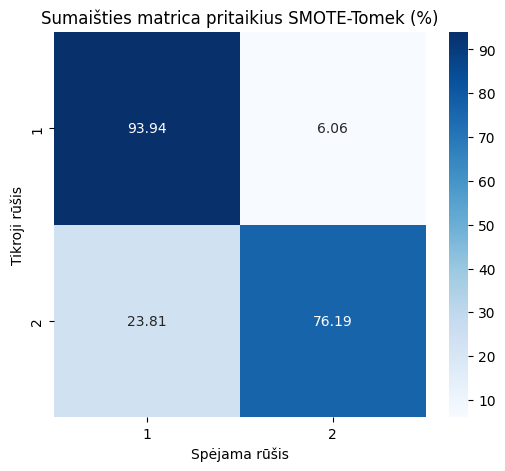

In [49]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the original data into train and test sets first
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE-Tomek only to the training data
smotetomek = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train, y_train)

# Train MLP Classifier on SMOTE-Tomek resampled training data
mlp_smotetomek = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=3)
mlp_smotetomek.fit(X_train_smotetomek, y_train_smotetomek)

# Make predictions on the original test set
y_pred = mlp_smotetomek.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Convert confusion matrix to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix in percentages
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Spėjama rūšis")
plt.title("Sumaišties matrica pritaikius SMOTE-Tomek (%)")
plt.ylabel("Tikroji rūšis")
plt.show()

Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           1       0.85      0.88      0.87        33
           2       0.80      0.76      0.78        21

    accuracy                           0.83        54
   macro avg       0.83      0.82      0.82        54
weighted avg       0.83      0.83      0.83        54



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


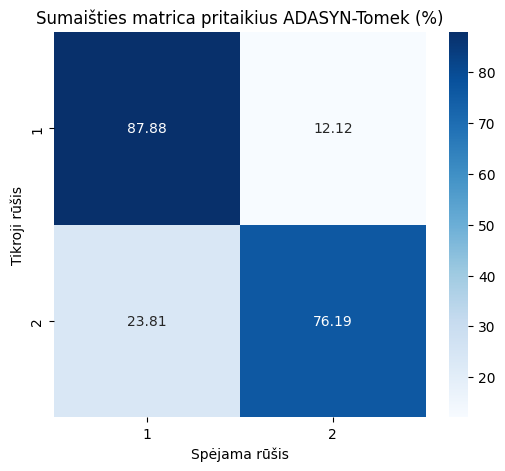

In [51]:
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the original data into train and test sets first
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply ADASYN for oversampling
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Apply Tomek Links for undersampling
tomek = TomekLinks()
X_train_adasyn_tomek, y_train_adasyn_tomek = tomek.fit_resample(X_train_adasyn, y_train_adasyn)

# Train MLP Classifier on ADASYN-Tomek resampled training data
mlp_adasyn_tomek = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=3)
mlp_adasyn_tomek.fit(X_train_adasyn_tomek, y_train_adasyn_tomek)

# Make predictions on the original test set
y_pred = mlp_adasyn_tomek.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Convert confusion matrix to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix in percentages
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Spėjama rūšis")
plt.title("Sumaišties matrica pritaikius ADASYN-Tomek (%)")
plt.ylabel("Tikroji rūšis")
plt.show()
